In [1]:
from sklearn import metrics
import math
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.use('Agg')  #enable when display not avalible

#call to generatre roc curves
def roc_curves(fpr_name, tpr_name, model_name):
    needed = ['hip lt',"shank lt", "foot lt", 'wrist lt', "shank rt", "foot rt", 'hip rt', 'wrist rt']
    with open(fpr_name, 'rb') as f:
        fpr_list = pickle.load(f)
    with open(tpr_name, 'rb') as f:
        tpr_list = pickle.load(f)
    from sklearn import metrics
    import math
    for graph in range(len(needed)):
        plt.plot(fpr_list[graph], tpr_list[graph], label= needed[graph]+ " " + str(round(metrics.auc(fpr_list[graph], tpr_list[graph]), 3)))
    plt.xlabel('False Positive Rate or (1 - Specificity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title(model_name)
    plt.legend(loc="lower right")
    plt.show()

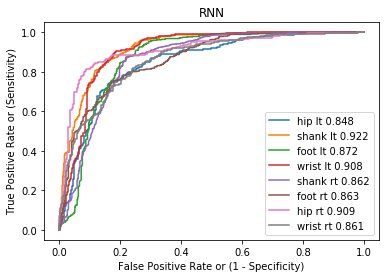

In [2]:
roc_curves('rnn_fpr_list_1.pkl', 'rnn_tpr_list_1.pkl', 'RNN')

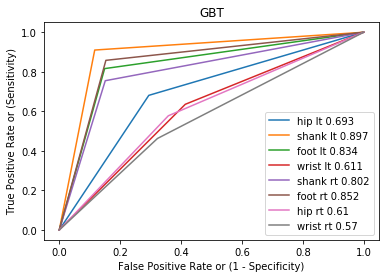

In [3]:
roc_curves('bdt_fpr_list_1.pkl', 'bdt_tpr_list_1.pkl', 'GBT')

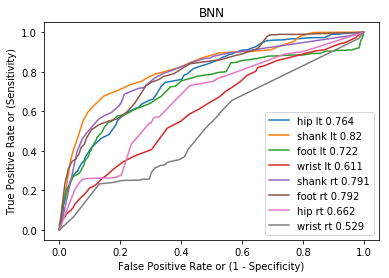

In [4]:
roc_curves('bnn_fpr_list_1.pkl', 'bnn_tpr_list_1.pkl', 'BNN')

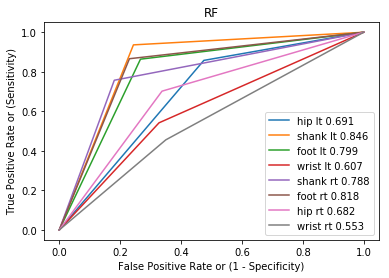

In [5]:
roc_curves('forests_fpr_list_1.pkl', 'forests_tpr_list_1.pkl', 'RF')

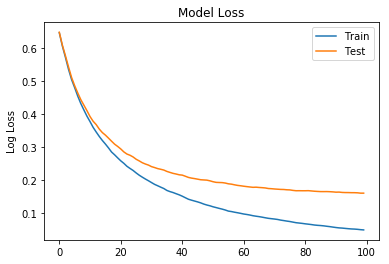

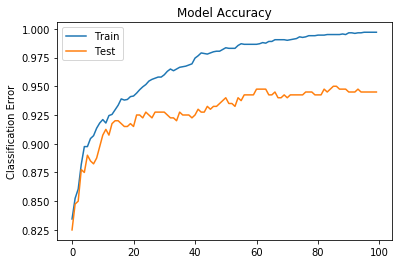

In [6]:
#BDT training loss&accuracy

from matplotlib import pyplot
import numpy as np
with open('bdt_log.pkl', 'rb') as f:
    results = pickle.load(f)

epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('Model Loss')
pyplot.savefig('f2.png')
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, 1- np.array(results['validation_0']['error']), label='Train')
ax.plot(x_axis, 1- np.array(results['validation_1']['error']), label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('Model Accuracy')
pyplot.savefig('f1.png')



Using TensorFlow backend.


['acc', 'loss', 'val_acc', 'val_loss']


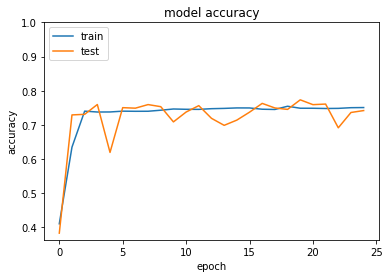

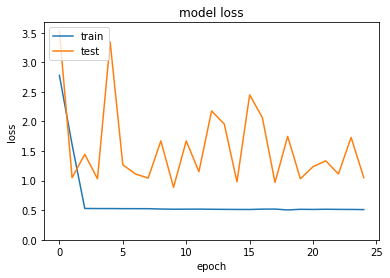

In [7]:
#BNN training loss&accuracy

with open('bnn_history.pkl', 'rb') as f:
    bnn_history = pickle.load(f)
history = bnn_history
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylim(top=1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(bottom=0)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

/usr/local/lib/python2.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


finished


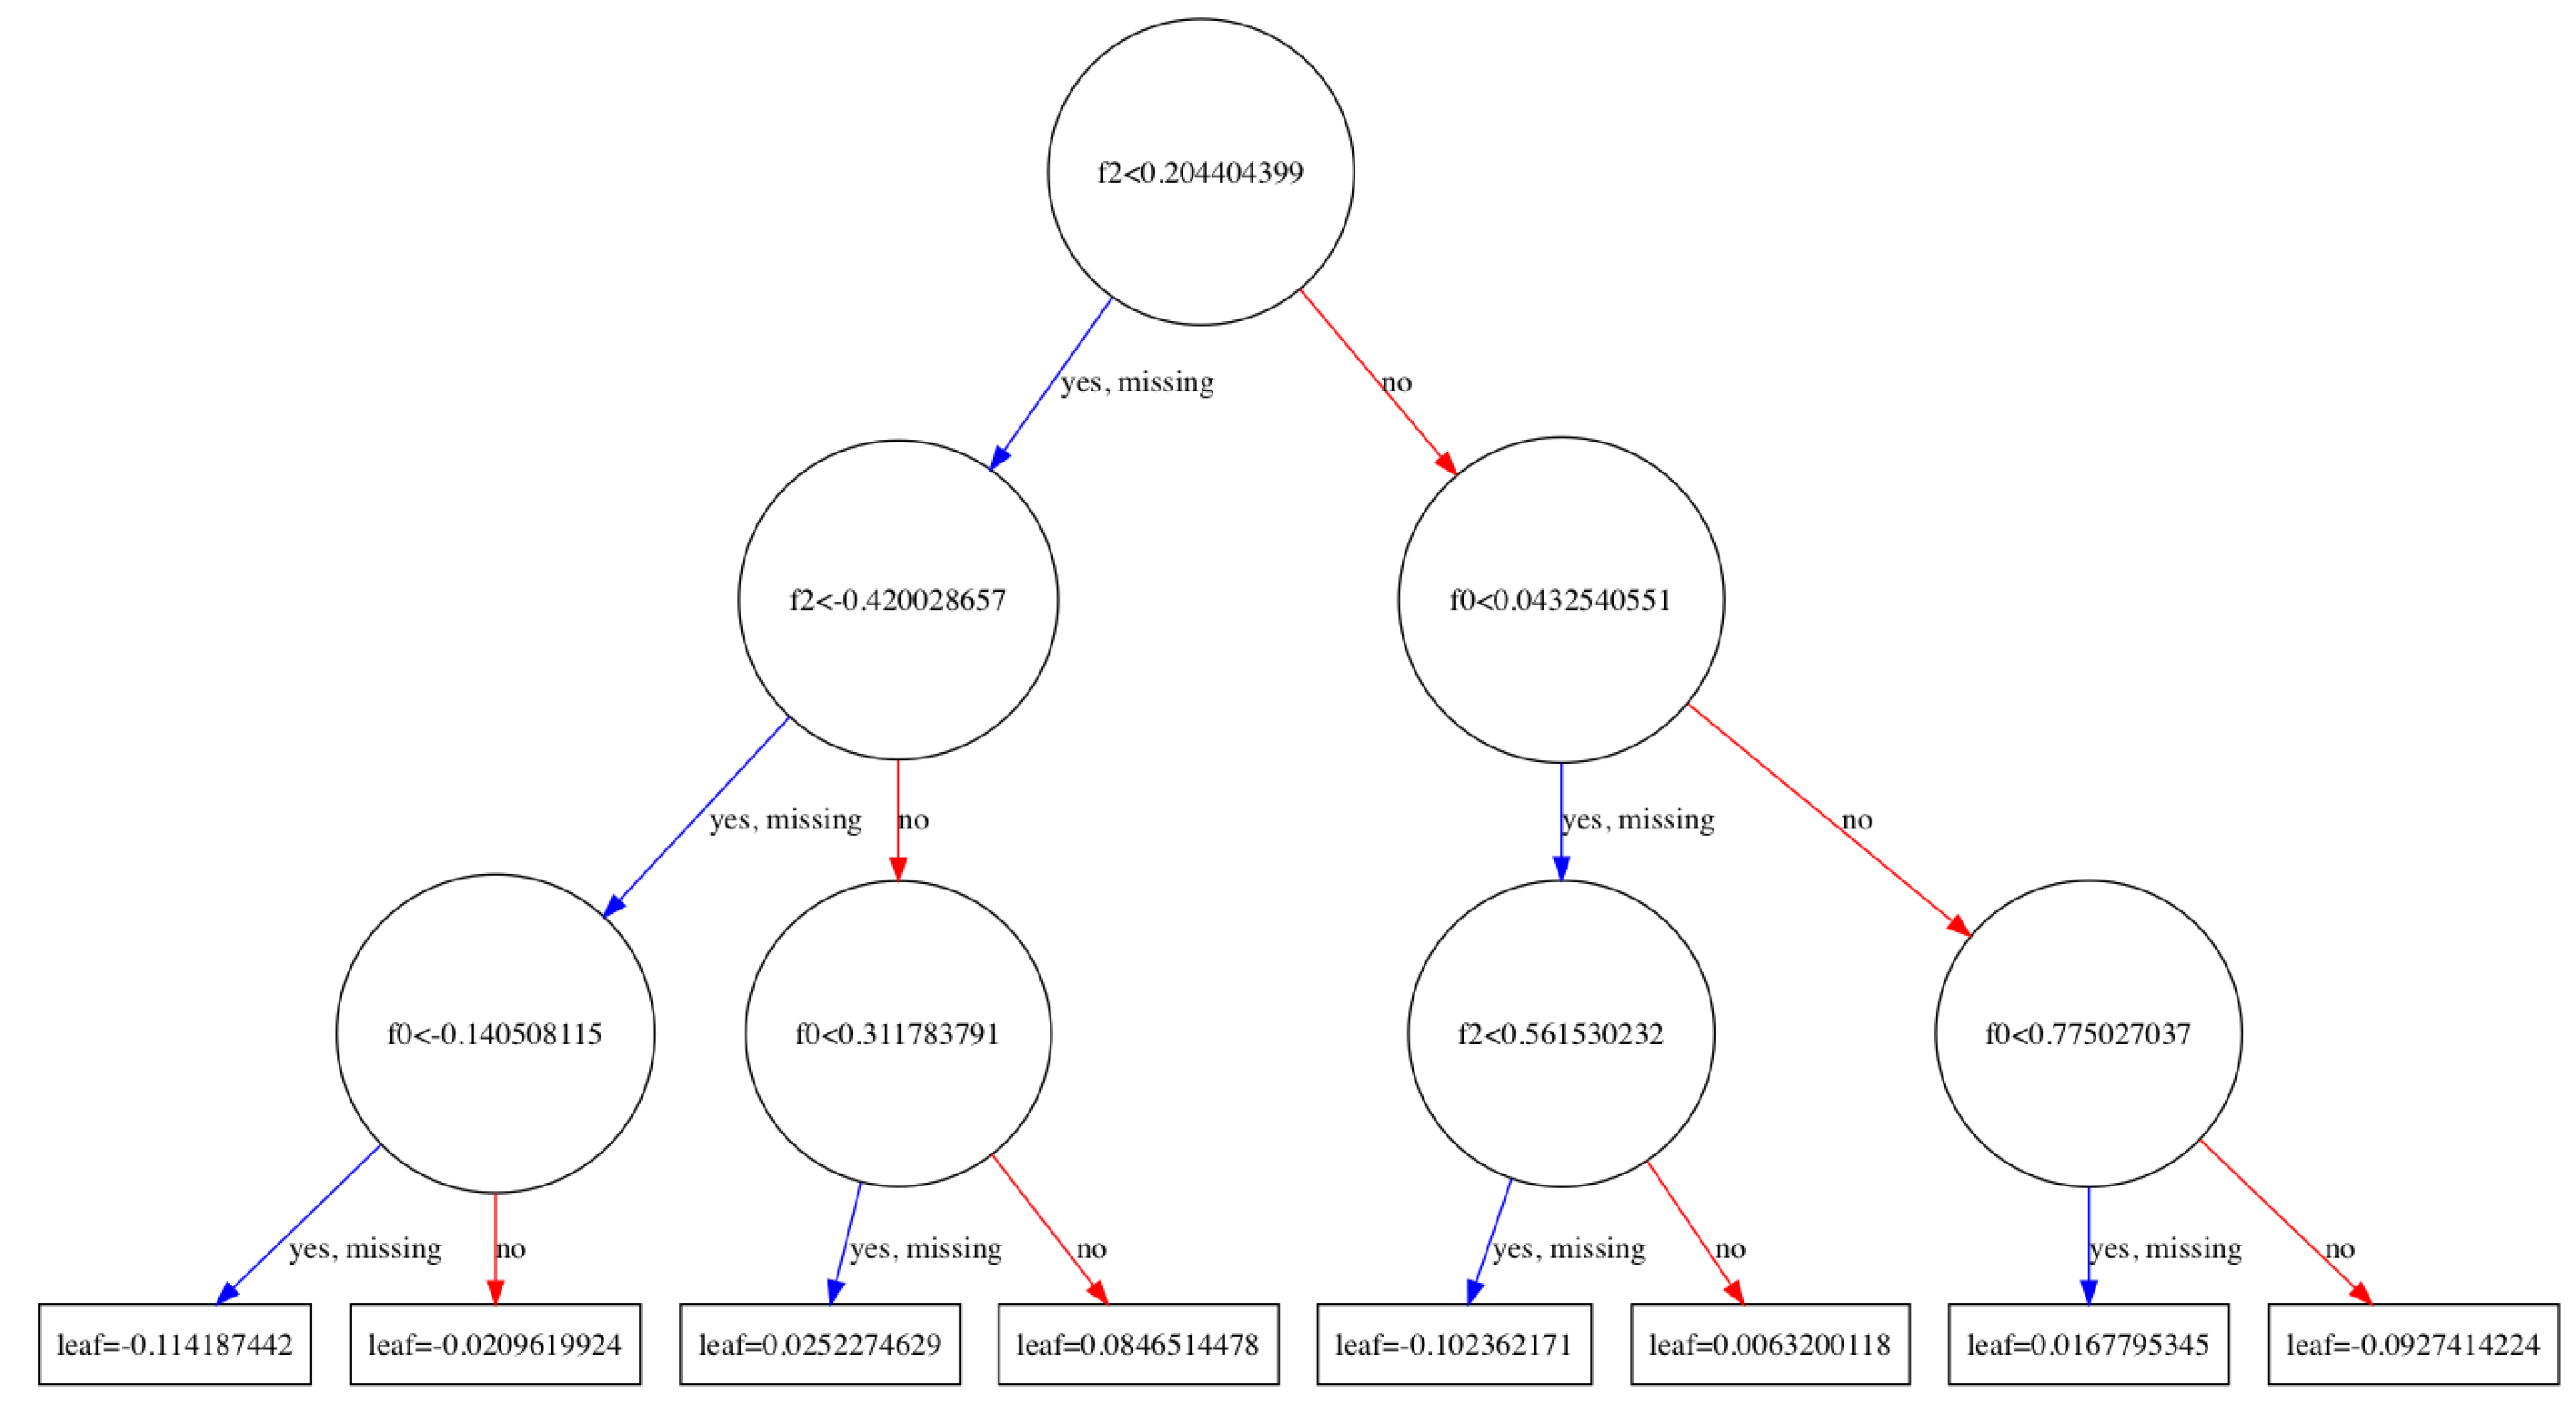

In [8]:
#single tree from gbt for single sensor input
from xgboost import XGBClassifier
import pickle
with open('bdt_model.pkl', 'rb') as f:
    bdt_model = pickle.load(f)
from xgboost import plot_tree
import xgboost as xgb
import matplotlib.pyplot as plt
#fig = plot_tree(bdt_model)
xgb.plot_tree(bdt_model, num_trees=5)
fig = plt.gcf()
fig.set_size_inches(50, 50)
fig.show()
print('finished')

In [3]:
print('l')

l
